In [129]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../utilities')

import utilities as util
import augmentations as aug
import visualization as viz
from training_utilities import TrainingMetrics, TrainingTimer
import glob
from astropy.io import fits
from random import randint


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Add two functions, one to retrieve input and GT and the other to retrieve input GT and prediction

In [130]:
def open_fits_with_mask(filename,DR = 2**14):
    image = fits.open(filename)
    cloud = image[0].data
    mask = image[1].data
    del image

    # Normalize image
    cloud  = cloud / DR
    return cloud , mask

def open_fits_with_mask_and_pred(filename,DR = 2**14):
    image = fits.open(filename)
    cloud = image[0].data
    mask = image[1].data
    pred = image[2].data
    del image

    # Normalize image
    cloud  = cloud / DR
    return cloud , mask, pred

In [3]:
train_images_list = glob.glob('../Results/LWIRISEG/Results/*Train*.fits')
val_images_list = glob.glob('../Results/LWIRISEG/Results/*Val*.fits')
print(len(train_images_list))
print(len(val_images_list))

200
200


In [4]:

train_fits = []
for indx in range(len(train_images_list)):
    train_fits.append(open_fits_with_mask_and_pred(filename=train_images_list[indx],DR = 1))

val_fits = []
for indx in range(len(val_images_list)):
    val_fits.append(open_fits_with_mask_and_pred(filename=val_images_list[indx],DR = 1))

In [70]:
indx = 0

Look manually for good images

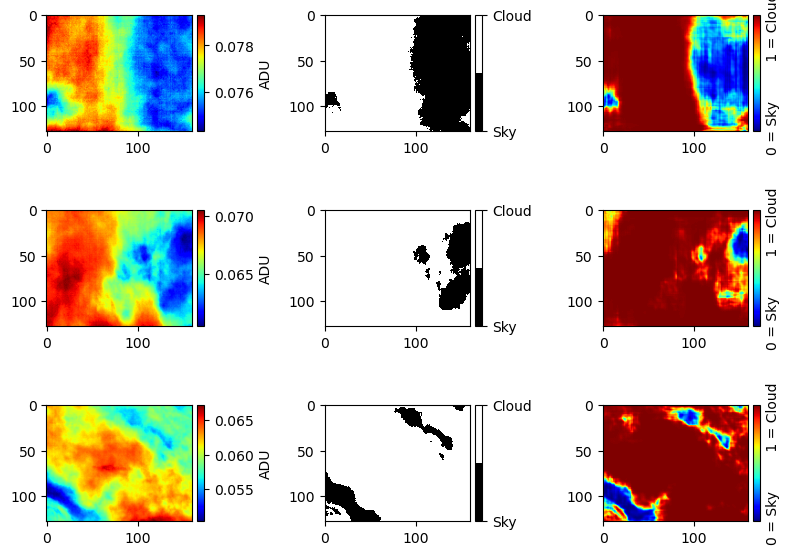

In [100]:
indx = indx + 1
if indx == ((len(train_fits)//5)+1):
    print("done")
nb = indx*3
viz.plot_image_preds(train_fits[nb-3:nb],figsize_per_row=(8,2))

In [132]:
indx_mask_demo = [17 , 38, 78]
indx_pred_demo = [25, 46, 48, 57]

input_demo = []
for indx in indx_mask_demo:
    input_demo.append(open_fits_with_mask(filename=train_images_list[indx],DR = 1))

pred_demo = []
for indx in indx_pred_demo:
    pred_demo.append(open_fits_with_mask_and_pred(filename=val_images_list[indx],DR = 1))


#viz.plot_images(input_demo,figsize_per_row=(8,2))
#viz.plot_image_preds(pred_demo,figsize_per_row=(8,2),predmask_cmap='coolwarm')
#viz.save_images(input_demo,f'output/sample_input.pdf',figsize_per_row=(8,2))
viz.save_image_preds(pred_demo,f'output/sample_prediction.pdf',figsize_per_row=(8,1.75),predmask_cmap='coolwarm')

Save other plots

In [11]:
viz.plot_roc_from_csv('../Results/LWIRISEG/roc_plot.csv','output/roc_plot.pdf')
viz.plot_training_data('../Results/LWIRISEG/metrics.csv','output/metrics')